
## Q1: What proportion of students who answer this question quickly will pass the class?

Assume the probability of passing the class is 0.9.
Assume the probability of answering this question quickly is 0.6 if you'll pass the class,
while the probability drops to 0.3 if you'll not pass the class. 


---

## Q1: My answer
**We know that:** 
$p(\text{pass}) = 0.9;$ 
$p(\text{quick} | \text{pass}) = 0.6;$ 
$p(\text{quick} | \text{fail}) = 0.3 $ 

**And we want to calculate:**
$$ p(\text{pass} | \text{quick}) $$

**According to Bayes Theorem, we have:**
\begin{align*}
p(\text{pass} | \text{quick}) = \frac{p(\text{quick} | \text{pass}) \times p(\text{pass})} {p(\text{quick})}
\end{align*}

**According to the law of total probability:**
$$ p(\text{quick}) = p(\text{quick} | \text{fail}) \times p(\text{fail}) + p(\text{quick} | \text{pass}) \times p(\text{pass})= 0.3 \times (1-0.9) + 0.6 \times 0.9 = 0.57 $$

**Therefore:**
\begin{align*}
p(\text{pass} | \text{quick}) = \frac{p(\text{quick} | \text{pass}) \times p(\text{pass})} {p(\text{quick})} = \frac{0.6 \times 0.9}{0.57} \approx 0.947
\end{align*}

## Q2: 
\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Multinomial}\\\\
\text{Prior} && p(\theta|\boldsymbol{\alpha}) &={} \texttt{Dirichlet} \\ 
\text{Posterior} && p(\theta|x,n,\boldsymbol{\alpha}) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

---

## Q2: My answer

**Likelihood**

For a Multinomial distribution with parameters $ \theta = (\theta_1, \theta_2, \ldots, \theta_k) $ and n trials, the probability of observing counts $ x = (x_1, x_2, \ldots, x_k) $ is given by:

\begin{align*}
p(x | \theta, n) = \frac{n!}{\prod_{i=1}^k x_i!} \prod_{i=1}^k \theta_i^{x_i}
\end{align*}

where:
$ \sum_{i=1}^k x_i = n; $
$ \sum_{i=1}^k \theta_i = 1 $

**Prior**

For a Dirichlet distribution with parameters $ \alpha = (\alpha_1, \alpha_2, \ldots, \alpha_k) $, the probability density function is:

\begin{align*}
p(\theta | \alpha) = \frac{1}{B(\alpha)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}
\end{align*}

where:
$ B(\alpha) $ is the multivariate Beta function, defined as:

\begin{align*}
B(\alpha) = \frac{\prod_{i=1}^k \Gamma(\alpha_i)}{\Gamma\left(\sum_{i=1}^k \alpha_i\right)}
\end{align*}

According to Bayes Theorem, we have posterior distribution:
\begin{align*}
p(\theta | x, n, \alpha) =\frac{\frac{n!}{\prod_{i=1}^k x_i!} \prod_{i=1}^k \theta_i^{x_i}\frac{\Gamma\left(\sum_{i=1}^k \alpha_i\right)}{\prod_{i=1}^k \Gamma(\alpha_i)} \prod_{i=1}^k \theta_i^{\alpha_i - 1}}{p(x)} 
\end{align*}

Since: 
\begin{align*}
\prod_{i=1}^k \theta_i^{x_i} \prod_{i=1}^k \theta_i^{\alpha_i - 1} = \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1}
\end{align*}
and the other terms do not concern the parameter $ \theta $

We could recognize that :
\begin{align*}
p(\theta | x, n, \alpha) \propto \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1}
\end{align*}

So the posterior distribution is still a Dirichlet distribution, but the parameterization is different: $ \text{Dirichlet}(\alpha_1 + x_1, \alpha_2 + x_2, \ldots, \alpha_k + x_k) $, and the posterior is always a proper distribution if the prior is a prpoer distribution.

# Q3
Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

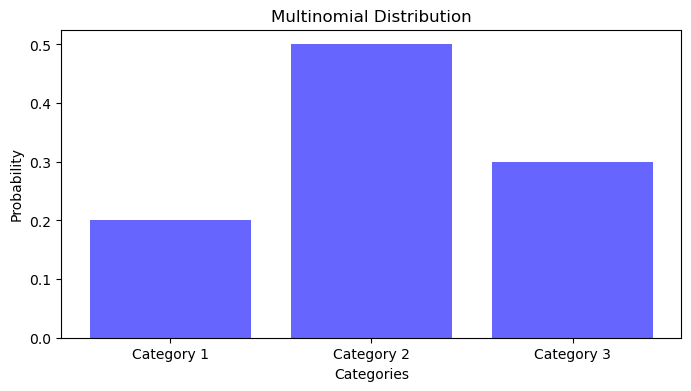

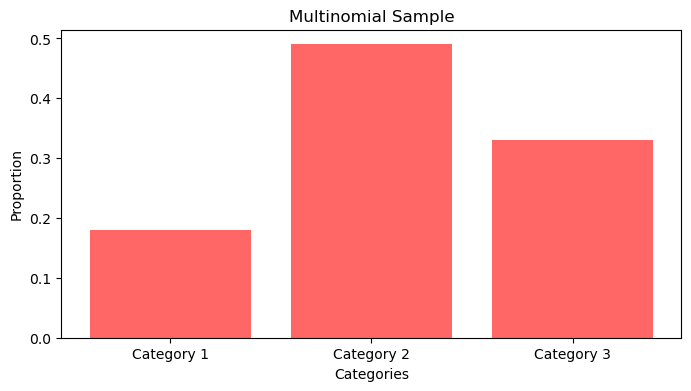

/opt/conda/lib/python3.11/site-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


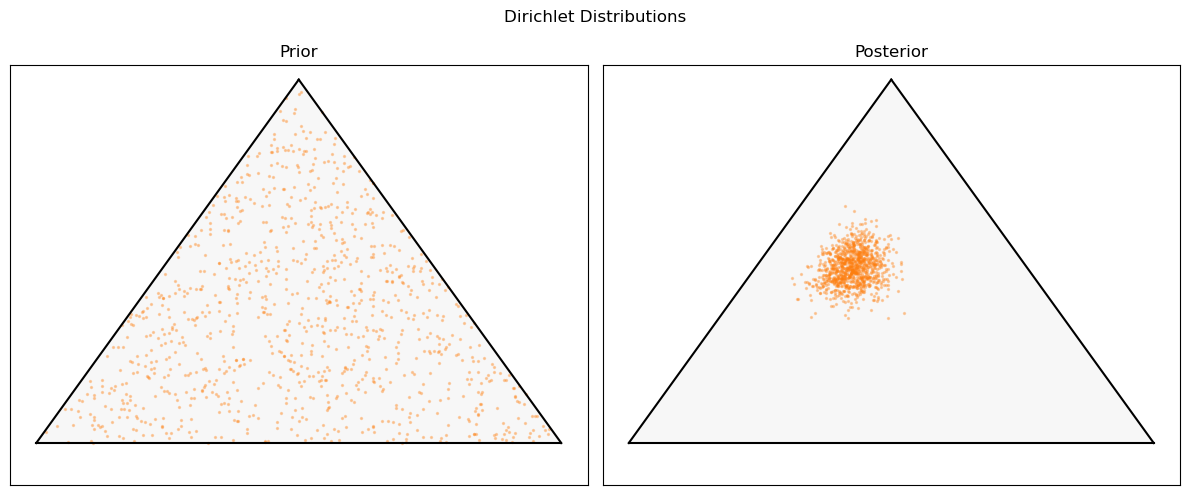

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ternary
from scipy.stats import dirichlet
from scipy.stats import multinomial

# Set up the parameters for the multinomial distribution
n = 100  # number of trials
p = [0.2, 0.5, 0.3]  # probabilities for each category

# Create a sample from the multinomial distribution
multinomial_sample = multinomial.rvs(n, p, size=1)[0]

# Visualize the multinomial distribution
plt.figure(figsize=(8, 4))
plt.bar(range(len(p)), p, color='b', alpha=0.6)
plt.xlabel('Categories')
plt.ylabel('Probability')
plt.title('Multinomial Distribution')
plt.xticks(range(len(p)), ['Category 1', 'Category 2', 'Category 3'])
plt.show()

# Visualize the multinomial sample
plt.figure(figsize=(8, 4))
plt.bar(range(len(multinomial_sample)), multinomial_sample/n, color='r', alpha=0.6)
plt.xlabel('Categories')
plt.ylabel('Proportion')
plt.title('Multinomial Sample')
plt.xticks(range(len(multinomial_sample)), ['Category 1', 'Category 2', 'Category 3'])
plt.show()
# Set up the Dirichlet distribution parameters
alpha_prior = [1, 1, 1]  # prior parameters
alpha_posterior = alpha_prior + multinomial_sample  # posterior parameters

# Visualize the Dirichlet distribution using a ternary plot
scale = 1.0
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot prior
fig.suptitle('Dirichlet Distributions')
ax[0].set_title('Prior')
tax = ternary.TernaryAxesSubplot(ax=ax[0], scale=scale)
tax.boundary()
prior_samples = dirichlet.rvs(alpha_prior, size=1000)
tax.scatter(prior_samples, s=2, alpha=0.3)
tax.clear_matplotlib_ticks()

# Plot posterior
ax[1].set_title('Posterior')
tax = ternary.TernaryAxesSubplot(ax=ax[1], scale=scale)
tax.boundary()
posterior_samples = dirichlet.rvs(alpha_posterior, size=1000)
tax.scatter(posterior_samples, s=2, alpha=0.3)
tax.clear_matplotlib_ticks()

plt.tight_layout()
plt.show()
